## Projeto Detecção de Fraude de Cartão de Crédito ( PIX?)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('default')
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [2]:
fraud_detection = pd.read_csv('creditcard.csv')
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
fraud_detection.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Tratar valores ausentes
fraud_detection.fillna(fraud_detection.mean(), inplace=True)

In [7]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Normalizando os dados
fraud_detection[["Time", "Amount"]] = (fraud_detection[["Time", "Amount"]] - fraud_detection[["Time", "Amount"]].mean()) / fraud_detection[["Time", "Amount"]].std()

In [9]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996580,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474,0
2,-1.996558,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684,0
3,-1.996558,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996537,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
fraud_detection.shape

(284807, 31)

### Analisando os dados

Há várias técnicas que você pode utilizar para lidar com desbalanceamento de dados. Algumas das técnicas mais comuns incluem:

Oversampling: consiste em criar cópias das instâncias da classe minoritária para aumentar a sua representatividade no conjunto de dados.

Undersampling: consiste em remover aleatoriamente instâncias da classe majoritária para diminuir a sua representatividade no conjunto de dados.

Synthetic Minority Over-sampling Technique (SMOTE): essa técnica cria novas instâncias sintéticas da classe minoritária através da combinação linear de instâncias existentes.

Adição de peso às classes: consiste em adicionar um peso maior à classe minoritária no cálculo da função de custo do modelo.

Ensemble de modelos: pode-se utilizar técnicas de ensemble para combinar vários modelos que foram treinados em subconjuntos do conjunto de dados. Essa técnica pode melhorar o desempenho do modelo em problemas de desbalanceamento.

Mudança da métrica de avaliação: em vez de utilizar métricas como acurácia, pode-se utilizar outras métricas que levam em conta o desbalanceamento do conjunto de dados, como F1-score, AUC-ROC, entre outras.

Essas são apenas algumas das técnicas que podem ser utilizadas para lidar com desbalanceamento de dados. A escolha da técnica mais apropriada depende do problema em questão e da disponibilidade de dados. É importante avaliar o desempenho do modelo em diferentes técnicas para determinar qual delas é a mais adequada para o seu problema.

<AxesSubplot:xlabel='Class', ylabel='count'>

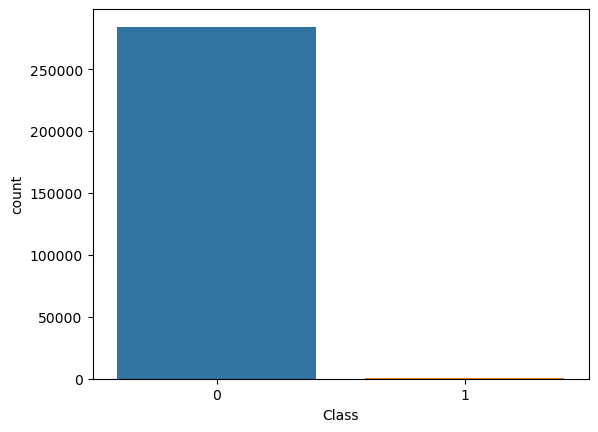

In [12]:
sns.countplot(x='Class', data=fraud_detection)

###  Note que a normalização dos dados é opcional, mas é recomendável para muitos modelos de aprendizagem de máquina. A conversão das colunas de tipo objeto para categórico também é opcional, mas pode ser benéfico para alguns modelos.





In [13]:
# Contagem de grupos
fraud_detection.groupby(by=['Class'])['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

### É possível notar a diferença da quantidade de uma classe para a outra. Com isso, é necessário o balanceamento das classes para uma análise mais justa

Class
0    284315
1       492
dtype: int64

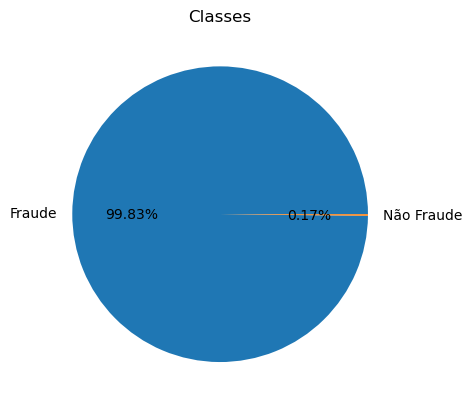

In [14]:
fraud_detection.value_counts('Class').plot.pie(autopct = '%.2f%%', labels = ("Fraude", "Não Fraude"), label = (''), title='Classes')
fraud_detection.value_counts('Class')

## Undersampling: consiste em remover aleatoriamente instâncias da classe majoritária para diminuir a sua representatividade no conjunto de dados.

Class
1    492
0    492
dtype: int64

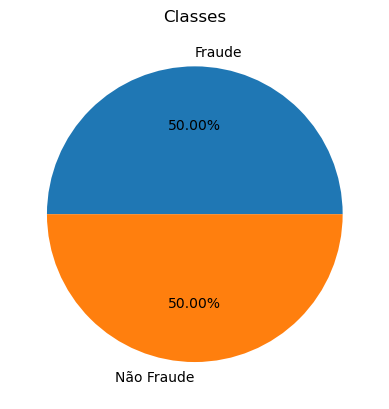

In [15]:
positivo = fraud_detection[fraud_detection["Class"] == 0]
negativo = fraud_detection[fraud_detection["Class"] == 1]

# Resampling the original dataset 
positivo_resample = positivo.sample(n = 492, random_state = 100)
negativo_resample = negativo.sample(n = 492, random_state = 100)

# Creating new dataset  
df_balanced = pd.concat([positivo_resample, negativo_resample], axis = 0)

df_balanced.value_counts("Class").plot.pie(autopct = '%.2f%%', labels = ("Fraude", "Não Fraude"), label = (''), title='Classes')
df_balanced.value_counts("Class")

In [16]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 222369 to 6338
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 

In [17]:
# Checagem das colunas
df_balanced.columns[:-1].values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [18]:
df_balanced.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-0.177369,-2.416610,1.845680,-3.505384,2.248600,-1.609099,-0.729982,-2.760838,0.281547,-1.305009,...,0.360251,0.010359,-0.019482,-0.039510,0.015733,0.024643,0.084117,0.030401,0.077428,0.500000
std,1.023704,5.495551,3.681987,6.233237,3.215184,4.228314,1.750490,5.906121,4.866134,2.317655,...,2.785877,1.159653,1.190685,0.570641,0.668402,0.492742,1.018221,0.429730,1.079863,0.500254
min,-1.990073,-30.552380,-13.057990,-31.103685,-3.457294,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.321129,-4.781606,-1.581931,-7.263482,-2.078186,-0.353229,0.000000
25%,-1.077871,-2.922415,-0.174014,-5.120349,-0.167281,-1.828002,-1.582428,-3.116665,-0.222826,-2.345829,...,-0.160381,-0.529501,-0.236017,-0.390744,-0.324945,-0.300362,-0.070985,-0.066704,-0.348831,0.000000
50%,-0.353812,-0.853917,0.994327,-1.380410,1.330821,-0.394061,-0.700651,-0.635696,0.142695,-0.717872,...,0.144007,0.042961,-0.031453,0.009751,0.046475,-0.031046,0.048798,0.033822,-0.281303,0.500000
75%,0.826014,1.022485,2.886875,0.380596,4.228237,0.459007,0.036572,0.295287,0.855025,0.147249,...,0.648533,0.574755,0.182750,0.393149,0.388699,0.322036,0.466568,0.220976,0.046539,1.000000
max,1.631336,2.365380,22.057729,3.133056,12.114672,11.095089,8.529013,15.469583,20.007208,5.636597,...,27.202839,8.361985,5.466230,3.148027,2.208209,2.992947,3.052358,1.779364,13.823960,1.000000


### Selecionando apenas os dados importantes para a análise

In [19]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
222369,1.013540,0.046137,0.881214,0.302074,-0.585253,0.417586,-1.128904,1.018863,-0.216100,-0.066571,...,-0.259028,-0.557688,0.066127,0.043527,-0.486044,0.137287,0.248573,0.097720,-0.345273,0
103444,-0.550829,-1.591957,1.713539,0.269043,0.064271,-0.790288,-0.398922,-0.009796,0.833390,0.186435,...,-0.215774,-0.492714,-0.039830,-0.100515,0.270056,0.276989,0.096303,0.060185,-0.197104,0
81835,-0.751743,1.205217,-0.143317,0.341558,0.650223,-0.286586,0.118432,-0.253357,0.091103,0.744127,...,-0.098941,-0.044282,-0.116956,-0.373154,0.535269,0.605666,-0.013150,0.001013,-0.293298,0
241973,1.188868,0.094646,0.746711,-0.050365,-0.748041,0.651131,-0.726142,0.908008,-0.083481,0.209904,...,-0.324887,-0.819738,-0.005201,-0.759517,-0.433912,0.189392,0.237128,0.086976,-0.337276,0
197355,0.782493,-2.506276,-3.830851,-2.597559,-1.185391,-5.755348,1.366631,7.924229,-2.264307,-3.062299,...,0.050375,1.316135,1.640480,1.005380,0.784796,0.279200,0.325590,-0.631457,6.575442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154693,0.164360,-2.488363,4.359019,-7.776410,5.364027,-1.823877,-2.445140,-4.964221,1.484890,-2.947899,...,1.325672,1.021226,-0.266476,-0.370880,0.365535,0.081372,0.184983,-0.211582,-0.349231,1
167305,0.500949,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,0.070128,1
151462,0.015691,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.346712,1
144754,-0.177683,-0.670238,0.945206,0.610051,2.640065,-2.707775,1.952611,-1.624608,-5.229908,0.210202,...,-2.504450,1.436472,0.351542,0.648467,0.579681,0.075738,0.346717,0.282209,0.941229,1


In [20]:
df_balanced = df_balanced.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])

In [21]:
df_balanced

,Time,Amount,Class
222369,1.013540,-0.345273,0
103444,-0.550829,-0.197104,0
81835,-0.751743,-0.293298,0
241973,1.188868,-0.337276,0
197355,0.782493,6.575442,0
...,...,...,...
154693,0.164360,-0.349231,1
167305,0.500949,0.070128,1
151462,0.015691,-0.346712,1
144754,-0.177683,0.941229,1


In [22]:
df_balanced = df_balanced.reset_index(drop=True)

In [23]:
df_balanced

,Time,Amount,Class
0,1.013540,-0.345273,0
1,-0.550829,-0.197104,0
2,-0.751743,-0.293298,0
3,1.188868,-0.337276,0
4,0.782493,6.575442,0
...,...,...,...
979,0.164360,-0.349231,1
980,0.500949,0.070128,1
981,0.015691,-0.346712,1
982,-0.177683,0.941229,1


In [24]:
df_balanced.shape

(984, 3)

## Aplicação dos modelos de ML dos trabalhos relacionados de classificação:
#### Seleção de modelos:
* Regressão Logística
* Árvore de Decisão
* KNeighborsClassifier
* SVM (retiramos pelo fato de demorar demais)
* Random Forest.
* XG Boost


#### Divisão dos dados

In [25]:
# Dividir os dados em features e labels
X = df_balanced.drop("Class", axis=1)
y = df_balanced["Class"]

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste usando o StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(738, 2) (246, 2) (738,) (246,)


In [27]:
# Dividir os dados em treinamento e teste usando o StratifiedShuffleSplit
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=0)
for train_index, val_index in sss_val.split(X_train, y_train):
    X_ajust, X_val = X[train_index], X[val_index]
    y_ajust, y_val = y[train_index], y[val_index]

### Observe que o conjunto de dados foi dividido primeiramente em dois grupos: o conjunto de treinamento e o conjunto de teste, e a partir do conjunto de treinamento, foi dividido novamente o próprio conjunto de treinamento em dois grupos: conjunto de ajuste e o conjunto de validação . O ajuste dos modelos será realizado apenas com os dados do conjunto de treinamento, a fim de avaliar a performance do modelo com dados desconhecidos durante os testes.

In [28]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(738, 2) (74, 2) (738,) (74,)


## PIPELINE REGRESSÃO LOGÍSTICA

In [29]:
pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Logistic_Regression', LogisticRegression())
])

param_grid = [
    {'Logistic_Regression__solver': ['newton-cg'],
    'Logistic_Regression__C': [1.0]}
]

#### Note que foi adicionado algumas configurações no modelo de Regressão Logística, como max_iter, solver, C, e penalty. Além disso,  o GridSearchCV é utilizado para ajustar nossos parâmetros em uma grade de valores e encontrar a melhor combinação.

In [30]:
import time

start_time = time.time()


pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Logistic_Regression', LogisticRegression(max_iter=1000))
])

param_grid = [
    {'Logistic_Regression__solver': ['newton-cg', 'lbfgs', 'sag'],
     'Logistic_Regression__C': [0.1, 1.0, 10.0, 100.0],
     'Logistic_Regression__penalty': ['l1', 'l2']}
]

### O mean_test_score é a média das pontuações de teste obtidas pelo modelo para cada combinação de hiperparâmetros avaliada. Ele é calculado como a média das pontuações de teste em todas as divisões de validação cruzada ou, se o treino é realizado com conjunto de validação único, com o conjunto de validação separado. Esse valor representa uma métrica de desempenho geral do modelo para aquele conjunto de hiperparâmetros.

### Verificarndo os resultados. Você pode acessar os melhores hyperparâmetros e a melhor pontuação usando os atributos `best_params_` , `best_score` (se for a métrica acurracy) e o `best_estimator`

In [31]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_train)

print("Melhores parâmetros: ", grid.best_params_)
print("Melhores hiper-parâmetros: ", grid.best_estimator_)
lr_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", lr_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results = []
results.append(("Melhores parâmetros: ", grid.best_params_))
results.append(("Melhores hiper-parâmetros: ", grid.best_estimator_))
results.append(("Melhor pontuação de validação cruzada: ", lr_mean_score))

df = pd.DataFrame(results)

df.to_csv("resultados_grid_search_RL.csv", index=False)

df.to_html("resultados_grid_search_RL.html")

Melhores parâmetros:  {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'newton-cg'}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg'))])
Melhor pontuação de validação cruzada:  0.5446773303916161
--- 0 minutes 0 seconds ---


In [32]:
# Using the best parameters from the grid search to fit the logistic regression model
lr_best = LogisticRegression(random_state=42, C=grid.best_params_['Logistic_Regression__C'], penalty=grid.best_params_['Logistic_Regression__penalty'])
lr_best.fit(X_train, y_train)

# Predict the test set
y_pred_lr = lr_best.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       123
           1       0.59      0.59      0.59       123

    accuracy                           0.59       246
   macro avg       0.59      0.59      0.59       246
weighted avg       0.59      0.59      0.59       246



### Para imprimir os resultados, basta iterar sobre os resultados e imprimir a raiz quadrada do erro quadrático médio negativo (que é o inverso da pontuação utilizada na busca pelos melhores parâmetros) e os parâmetros para cada combinação

In [33]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l1', 'Logistic_Regression__solver': 'newton-cg'}
nan {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l1', 'Logistic_Regression__solver': 'lbfgs'}
nan {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l1', 'Logistic_Regression__solver': 'sag'}
nan {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'newton-cg'}
nan {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'lbfgs'}
nan {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'sag'}
nan {'Logistic_Regression__C': 1.0, 'Logistic_Regression__penalty': 'l1', 'Logistic_Regression__solver': 'newton-cg'}
nan {'Logistic_Regression__C': 1.0, 'Logistic_Regression__penalty': 'l1', 'Logistic_Regression__solver': 'lbfgs'}
nan {'Logistic_Regression__C': 1.0, 'Logistic_Regression__penalty': 'l1', 'Logis

In [34]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Logistic_Regression__C,param_Logistic_Regression__penalty,param_Logistic_Regression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001304,0.000400,0.000000,0.000000,0.1,l1,newton-cg,"{'Logistic_Regression__C': 0.1, 'Logistic_Regr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
1,0.001021,0.000031,0.000000,0.000000,0.1,l1,lbfgs,"{'Logistic_Regression__C': 0.1, 'Logistic_Regr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
2,0.000641,0.000458,0.000000,0.000000,0.1,l1,sag,"{'Logistic_Regression__C': 0.1, 'Logistic_Regr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.004397,0.000888,0.000800,0.000400,0.1,l2,newton-cg,"{'Logistic_Regression__C': 0.1, 'Logistic_Regr...",0.506757,0.567568,0.587838,0.496599,0.564626,0.544677,0.036150,1
4,0.003588,0.000400,0.000110,0.000221,0.1,l2,lbfgs,"{'Logistic_Regression__C': 0.1, 'Logistic_Regr...",0.506757,0.567568,0.587838,0.496599,0.564626,0.544677,0.036150,1
5,0.003506,0.000337,0.000456,0.000607,0.1,l2,sag,"{'Logistic_Regression__C': 0.1, 'Logistic_Regr...",0.506757,0.567568,0.587838,0.496599,0.564626,0.544677,0.036150,1
6,0.001096,0.000207,0.000000,0.000000,1,l1,newton-cg,"{'Logistic_Regression__C': 1.0, 'Logistic_Regr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,0.001074,0.000754,0.000000,0.000000,1,l1,lbfgs,"{'Logistic_Regression__C': 1.0, 'Logistic_Regr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
8,0.001121,0.000493,0.000000,0.000000,1,l1,sag,"{'Logistic_Regression__C': 1.0, 'Logistic_Regr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
9,0.004882,0.001087,0.000400,0.000490,1,l2,newton-cg,"{'Logistic_Regression__C': 1.0, 'Logistic_Regr...",0.500000,0.567568,0.594595,0.496599,0.564626,0.544677,0.039297,1


## PIPELINE ÁRVORE DE DECISÃO

In [35]:
start_time = time.time()

pipe_TREE = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Decision_Tree', DecisionTreeClassifier())
])

param_grid_TREE = [
    {'Decision_Tree__criterion': ['gini', 'entropy'],
     'Decision_Tree__max_depth': [1, 2, 4, 8, 16, 32, None]}
]

In [36]:
grid1 = GridSearchCV(pipe_TREE, param_grid_TREE, cv=5)
grid1.fit(X_train, y_train)

y_pred = grid1.predict(X_train)

print("Melhores parâmetros: ", grid1.best_params_)
print("Melhores hiper-parâmetros: ", grid1.best_estimator_)
dtc_mean_score = grid1.best_score_
print("Melhor pontuação de validação cruzada: ", dtc_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results1 = []
results1.append(("Melhores parâmetros: ", grid1.best_params_))
results1.append(("Melhores hiper-parâmetros: ", grid1.best_estimator_))
results1.append(("Melhor pontuação de validação cruzada: ", dtc_mean_score))
df1 = pd.DataFrame(results1)

df1.to_csv("resultados_grid_search_TREE.csv", index=False)

df1.to_html("resultados_grid_search_TREE.html")

Melhores parâmetros:  {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 4}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Decision_Tree', DecisionTreeClassifier(max_depth=4))])
Melhor pontuação de validação cruzada:  0.7099558742415886
--- 0 minutes 0 seconds ---


In [37]:
# Using the best parameters from the grid search to fit the decision tree classifier
dtc_best = DecisionTreeClassifier(random_state=42, criterion=grid1.best_params_['Decision_Tree__criterion'], max_depth=grid1.best_params_['Decision_Tree__max_depth'])
dtc_best.fit(X_train, y_train)

# Predict the test set
y_pred_dtc = dtc_best.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_dtc))


              precision    recall  f1-score   support

           0       0.71      0.72      0.72       123
           1       0.72      0.71      0.71       123

    accuracy                           0.72       246
   macro avg       0.72      0.72      0.72       246
weighted avg       0.72      0.72      0.72       246



In [38]:
cvres = grid1.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 1}
nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 2}
nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 4}
nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 8}
nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 16}
nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 32}
nan {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': None}
nan {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 1}
nan {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 2}
nan {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 4}
nan {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 8}
nan {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 16}
nan {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 32}
nan {'Decision_Tree__criterion': 'entro

In [39]:
pd.DataFrame(grid1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Decision_Tree__criterion,param_Decision_Tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001943,0.000145,0.000808,0.000404,gini,1,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.601351,0.581081,0.581081,0.585034,0.639456,0.597601,0.022224,13
1,0.001908,0.000490,0.000358,0.000373,gini,2,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.709459,0.675676,0.682432,0.605442,0.707483,0.676099,0.037764,11
2,0.001805,0.000400,0.000924,0.000518,gini,4,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.743243,0.682432,0.756757,0.646259,0.721088,0.709956,0.040589,1
3,0.002592,0.000389,0.000101,0.000202,gini,8,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.743243,0.662162,0.736486,0.625850,0.727891,0.699127,0.046702,2
4,0.002558,0.000786,0.000200,0.000399,gini,16,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.743243,0.668919,0.702703,0.646259,0.707483,0.693721,0.033438,4
5,0.002589,0.000461,0.000201,0.000403,gini,32,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.743243,0.675676,0.695946,0.666667,0.700680,0.696442,0.026557,3
6,0.002502,0.000489,0.000602,0.000491,gini,None,"{'Decision_Tree__criterion': 'gini', 'Decision...",0.736486,0.655405,0.682432,0.666667,0.693878,0.686974,0.028031,6
7,0.001403,0.000492,0.000811,0.000406,entropy,1,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.601351,0.581081,0.581081,0.585034,0.639456,0.597601,0.022224,13
8,0.001149,0.000189,0.000718,0.000413,entropy,2,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.709459,0.675676,0.682432,0.605442,0.707483,0.676099,0.037764,11
9,0.001304,0.000408,0.000484,0.000606,entropy,4,"{'Decision_Tree__criterion': 'entropy', 'Decis...",0.736486,0.668919,0.702703,0.632653,0.687075,0.685567,0.034542,7


## PIPELINE KNN

In [40]:
start_time = time.time()

pipe_KNN = Pipeline([
    ('std_scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier())
])

param_grid_KNN = [
    {'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
     'KNN__weights': ['uniform', 'distance']}
]

A pontuação média se refere à métrica de avaliação usada no parâmetro scoring do objeto GridSearchCV. Por padrão, se scoring não for definido explicitamente, ele será definido como None, o que significa que a pontuação média será a acurácia do modelo. Portanto, no código apresentado, a pontuação média refere-se à acurácia média do modelo durante a validação cruzada. No entanto, se outro parâmetro de métrica de avaliação tivesse sido especificado, como por exemplo f1 ou roc_auc, a pontuação média seria a média daquela métrica de avaliação em vez da acurácia.

In [41]:
grid2 = GridSearchCV(pipe_KNN, param_grid_KNN, cv=5)
grid2.fit(X_train, y_train)

y_pred = grid2.predict(X_train)

print("Melhores parâmetros: ", grid2.best_params_)
print("Melhores hiper-parâmetros: ", grid2.best_estimator_)
knn_mean_score = grid2.best_score_
print("Melhor pontuação de validação cruzada: ", knn_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results2 = []
results2.append(("Melhores parâmetros: ", grid2.best_params_))
results2.append(("Melhores hiper-parâmetros: ", grid2.best_estimator_))
results2.append(("Melhor pontuação de validação cruzada: ", knn_mean_score))

df2 = pd.DataFrame(results2)

df2.to_csv("resultados_grid_search_KNN.csv", index=False)

df2.to_html("resultados_grid_search_KNN.html")

Melhores parâmetros:  {'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])
Melhor pontuação de validação cruzada:  0.6774315131457989
--- 0 minutes 0 seconds ---


In [42]:
# Using the best parameters from the grid search to fit the KNN
knn_best = KNeighborsClassifier(n_neighbors=grid2.best_params_['KNN__n_neighbors'], weights=grid2.best_params_['KNN__weights'])
knn_best.fit(X_train, y_train)

# Predict the test set
y_pred_knn = knn_best.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       123
           1       0.65      0.71      0.68       123

    accuracy                           0.66       246
   macro avg       0.66      0.66      0.66       246
weighted avg       0.66      0.66      0.66       246



In [43]:
cvres = grid2.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 1, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 2, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 3, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 7, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 8, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
nan {'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}
nan {'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
n

In [44]:
pd.DataFrame(grid2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,param_KNN__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001945,0.000233,0.004230,0.000707,1,uniform,"{'KNN__n_neighbors': 1, 'KNN__weights': 'unifo...",0.662162,0.601351,0.648649,0.585034,0.653061,0.630051,0.030844,18
1,0.001435,0.000529,0.000901,0.000197,1,distance,"{'KNN__n_neighbors': 1, 'KNN__weights': 'dista...",0.662162,0.601351,0.648649,0.585034,0.653061,0.630051,0.030844,18
2,0.001576,0.000476,0.003048,0.000572,2,uniform,"{'KNN__n_neighbors': 2, 'KNN__weights': 'unifo...",0.641892,0.621622,0.675676,0.585034,0.659864,0.636817,0.031557,15
3,0.000995,0.000023,0.000717,0.000599,2,distance,"{'KNN__n_neighbors': 2, 'KNN__weights': 'dista...",0.662162,0.601351,0.648649,0.585034,0.653061,0.630051,0.030844,18
4,0.001465,0.000411,0.003663,0.000467,3,uniform,"{'KNN__n_neighbors': 3, 'KNN__weights': 'unifo...",0.702703,0.668919,0.662162,0.625850,0.666667,0.665260,0.024413,9
5,0.001721,0.000891,0.001684,0.000411,3,distance,"{'KNN__n_neighbors': 3, 'KNN__weights': 'dista...",0.709459,0.668919,0.682432,0.605442,0.666667,0.666584,0.034156,7
6,0.001602,0.000491,0.003550,0.001096,4,uniform,"{'KNN__n_neighbors': 4, 'KNN__weights': 'unifo...",0.709459,0.662162,0.655405,0.598639,0.625850,0.650303,0.037238,11
7,0.001670,0.000459,0.001005,0.000637,4,distance,"{'KNN__n_neighbors': 4, 'KNN__weights': 'dista...",0.729730,0.655405,0.675676,0.625850,0.659864,0.669305,0.034241,6
8,0.001697,0.000397,0.004997,0.001392,5,uniform,"{'KNN__n_neighbors': 5, 'KNN__weights': 'unifo...",0.709459,0.641892,0.689189,0.605442,0.612245,0.651646,0.041314,10
9,0.002654,0.000429,0.002013,0.000662,5,distance,"{'KNN__n_neighbors': 5, 'KNN__weights': 'dista...",0.716216,0.662162,0.702703,0.625850,0.653061,0.671999,0.033115,4


## PIPELINE RANDOM FOREST TREE

In [45]:
start_time = time.time()

pipe_RFOREST = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Random_Forest', RandomForestClassifier())
])

param_grid_RFOREST = [
    {'Random_Forest__n_estimators': [10, 50, 100, 200, 500],
     'Random_Forest__criterion': ['gini', 'entropy'],
     'Random_Forest__max_depth': [1, 2, 4, 8, 16, 32, None]}
]

In [46]:
grid3 = GridSearchCV(pipe_RFOREST, param_grid_RFOREST, cv=5)
grid3.fit(X_train, y_train)

y_pred = grid3.predict(X_train)

print("Melhores parâmetros: ", grid3.best_params_)
print("Melhores hiper-parâmetros: ", grid3.best_estimator_)
rf_mean_score = grid3.best_score_
print("Melhor pontuação de validação cruzada: ", rf_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results3 = []
results3.append(("Melhores parâmetros: ", grid3.best_params_))
results3.append(("Melhores hiper-parâmetros: ", grid3.best_estimator_))
results3.append(("Melhor pontuação de validação cruzada: ", rf_mean_score))

df3 = pd.DataFrame(results3)

df3.to_csv("resultados_grid_search_RFOREST.csv", index=False)

df3.to_html("resultados_grid_search_RFOREST.html")

Melhores parâmetros:  {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 16, 'Random_Forest__n_estimators': 100}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Random_Forest', RandomForestClassifier(max_depth=16))])
Melhor pontuação de validação cruzada:  0.73437212722927
--- 1 minutes 28 seconds ---


In [47]:
# Using the best parameters from the grid search to fit the RandomForestClassifier
rf_best = RandomForestClassifier(n_estimators=grid3.best_params_['Random_Forest__n_estimators'], 
                                  criterion=grid3.best_params_['Random_Forest__criterion'], 
                                  max_depth=grid3.best_params_['Random_Forest__max_depth'])
rf_best.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf_best.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       123
           1       0.72      0.72      0.72       123

    accuracy                           0.72       246
   macro avg       0.72      0.72      0.72       246
weighted avg       0.72      0.72      0.72       246



In [48]:
cvres = grid3.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 1, 'Random_Forest__n_estimators': 10}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 1, 'Random_Forest__n_estimators': 50}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 1, 'Random_Forest__n_estimators': 100}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 1, 'Random_Forest__n_estimators': 200}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 1, 'Random_Forest__n_estimators': 500}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 2, 'Random_Forest__n_estimators': 10}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 2, 'Random_Forest__n_estimators': 50}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 2, 'Random_Forest__n_estimators': 100}
nan {'Random_Forest__criterion': 'gini', 'Random_Forest__max_depth': 2, 'Random_Forest__n_estimators': 200}
nan {'Random_Forest__criterion':

In [49]:
pd.DataFrame(grid3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_Forest__criterion,param_Random_Forest__max_depth,param_Random_Forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013442,0.001373,0.001169,0.000421,gini,1,10,"{'Random_Forest__criterion': 'gini', 'Random_F...",0.587838,0.655405,0.581081,0.591837,0.639456,0.611123,0.030267,68
1,0.060035,0.003292,0.004701,0.000521,gini,1,50,"{'Random_Forest__criterion': 'gini', 'Random_F...",0.621622,0.587838,0.628378,0.585034,0.693878,0.623350,0.039323,65
2,0.118935,0.004545,0.010909,0.001423,gini,1,100,"{'Random_Forest__criterion': 'gini', 'Random_F...",0.635135,0.614865,0.614865,0.585034,0.714286,0.632837,0.043750,61
3,0.227302,0.005513,0.016658,0.002706,gini,1,200,"{'Random_Forest__criterion': 'gini', 'Random_F...",0.614865,0.594595,0.628378,0.598639,0.700680,0.627432,0.038552,63
4,0.591783,0.043552,0.040692,0.004416,gini,1,500,"{'Random_Forest__criterion': 'gini', 'Random_F...",0.614865,0.594595,0.614865,0.585034,0.714286,0.624729,0.046258,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.017575,0.002198,0.001619,0.000505,entropy,None,10,"{'Random_Forest__criterion': 'entropy', 'Rando...",0.722973,0.729730,0.736486,0.707483,0.700680,0.719470,0.013445,22
66,0.078321,0.004755,0.005489,0.000943,entropy,None,50,"{'Random_Forest__criterion': 'entropy', 'Rando...",0.756757,0.709459,0.770270,0.687075,0.700680,0.724848,0.032647,14
67,0.158181,0.005407,0.009681,0.001033,entropy,None,100,"{'Random_Forest__criterion': 'entropy', 'Rando...",0.763514,0.722973,0.722973,0.707483,0.700680,0.723525,0.021812,16
68,0.341927,0.029481,0.021052,0.003756,entropy,None,200,"{'Random_Forest__criterion': 'entropy', 'Rando...",0.763514,0.729730,0.750000,0.687075,0.707483,0.727560,0.027724,7


## PIPELINE XG BOOST

In [50]:
import xgboost as xgb

In [51]:
start_time = time.time()

pipe_XGBOOST = Pipeline([
    ('std_scaler', StandardScaler()),
    ('XGBoost', xgb.XGBClassifier())
])

param_grid_XGBOOST = [
    {'XGBoost__n_estimators': [10, 50, 100, 200, 500],
     'XGBoost__max_depth': [1, 2, 4, 8, 16, 32, None],
     'XGBoost__learning_rate': [0.001, 0.01, 0.1, 1.0]}
]

In [52]:
grid4 = GridSearchCV(pipe_XGBOOST, param_grid_XGBOOST, cv=5)
grid4.fit(X_train, y_train)

y_pred = grid4.predict(X_train)

print("Melhores parâmetros: ", grid4.best_params_)
print("Melhores hiper-parâmetros: ", grid4.best_estimator_)
xgb_mean_score = grid4.best_score_
print("Melhor pontuação de validação cruzada: ", xgb_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results4 = []
results4.append(("Melhores parâmetros: ", grid4.best_params_))
results4.append(("Melhores hiper-parâmetros: ", grid4.best_estimator_))
results4.append(("Melhor pontuação de validação cruzada: ", xgb_mean_score))


df4 = pd.DataFrame(results4)

df4.to_csv("resultados_grid_search_XGBOOST.csv", index=False)

df4.to_html("resultados_grid_search_XGBOOST.html")

[00:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [53]:
# Using the best parameters from the grid search to fit the XGBClassifier
xgb_best = xgb.XGBClassifier(n_estimators=grid4.best_params_['XGBoost__n_estimators'], 
                                max_depth=grid4.best_params_['XGBoost__max_depth'],
                             learning_rate=grid4.best_params_['XGBoost__learning_rate'])

xgb_best.fit(X_train, y_train)

# Predict the test set
y_pred_xgb = xgb_best.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_xgb))


[00:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       123
           1       0.76      0.76      0.76       123

    accuracy                           0.76       246
   macro avg       0.76      0.76      0.76       246
weighted avg       0.76      0.76      0.76       246



In [54]:
cvres = grid4.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 1, 'XGBoost__n_estimators': 10}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 1, 'XGBoost__n_estimators': 50}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 1, 'XGBoost__n_estimators': 100}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 1, 'XGBoost__n_estimators': 200}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 1, 'XGBoost__n_estimators': 500}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 2, 'XGBoost__n_estimators': 10}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 2, 'XGBoost__n_estimators': 50}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 2, 'XGBoost__n_estimators': 100}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 2, 'XGBoost__n_estimators': 200}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 2, 'XGBoost__n_estimators': 500}
nan {'XGBoost__learning_rate': 0.001, 'XGBoost__max_depth': 4, 'XGBoost__n

In [55]:
pd.DataFrame(grid4.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__learning_rate,param_XGBoost__max_depth,param_XGBoost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016442,0.012368,0.003784,0.000705,0.001,1,10,"{'XGBoost__learning_rate': 0.001, 'XGBoost__ma...",0.601351,0.581081,0.581081,0.585034,0.639456,0.597601,0.022224,137
1,0.024967,0.002705,0.003793,0.000267,0.001,1,50,"{'XGBoost__learning_rate': 0.001, 'XGBoost__ma...",0.601351,0.581081,0.581081,0.585034,0.639456,0.597601,0.022224,137
2,0.051142,0.005247,0.003483,0.000522,0.001,1,100,"{'XGBoost__learning_rate': 0.001, 'XGBoost__ma...",0.601351,0.581081,0.581081,0.585034,0.639456,0.597601,0.022224,137
3,0.099362,0.017480,0.004414,0.000940,0.001,1,200,"{'XGBoost__learning_rate': 0.001, 'XGBoost__ma...",0.601351,0.581081,0.581081,0.605442,0.707483,0.615288,0.047183,136
4,0.218853,0.039398,0.003915,0.000578,0.001,1,500,"{'XGBoost__learning_rate': 0.001, 'XGBoost__ma...",0.716216,0.675676,0.581081,0.605442,0.707483,0.657180,0.054453,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.020204,0.003057,0.003904,0.000655,1,None,10,"{'XGBoost__learning_rate': 1.0, 'XGBoost__max_...",0.763514,0.689189,0.709459,0.666667,0.707483,0.707262,0.032074,50
136,0.064498,0.011588,0.003698,0.000584,1,None,50,"{'XGBoost__learning_rate': 1.0, 'XGBoost__max_...",0.750000,0.716216,0.709459,0.653061,0.707483,0.707244,0.031143,54
137,0.094198,0.008337,0.003673,0.000706,1,None,100,"{'XGBoost__learning_rate': 1.0, 'XGBoost__max_...",0.756757,0.722973,0.722973,0.666667,0.707483,0.715370,0.029198,34
138,0.175897,0.015188,0.004011,0.000539,1,None,200,"{'XGBoost__learning_rate': 1.0, 'XGBoost__max_...",0.756757,0.729730,0.722973,0.659864,0.707483,0.715361,0.032000,35


Depois de encontrar os melhores parâmetros com o grid search, você pode usá-los para treinar seu modelo novamente com todos os dados de treinamento disponíveis. Em seguida, você pode avaliar o desempenho do modelo com os dados de teste ou com dados adicionais que não foram usados durante o treinamento. É importante lembrar que o grid search é uma técnica para ajustar os parâmetros do modelo, e não para avaliar o desempenho do modelo. Portanto, é importante avaliar o desempenho do modelo com dados independentes para avaliar a sua capacidade de generalização. Além disso, é importante monitorar se o modelo está sofrendo de overfitting ou underfitting, o que pode ser feito comparando o desempenho do modelo nos dados de treinamento e de teste. Se o modelo estiver sofrendo de overfitting, você pode tentar usar técnicas como regularização, redução de dimensionalidade ou coleta de mais dados. Se o modelo estiver sofrendo de underfitting, você pode tentar adicionar mais características ou usar modelos mais complexos.

# Resultados MÉTRICAS DE AVALIAÇÃO

In [56]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [57]:
lr_mean_score # média do score da regressão logística
precision = precision_score(y_train, grid.predict(X_train))
recall = recall_score(y_train, grid.predict(X_train))
f1 = f1_score(y_train, grid.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid.predict(X_train))
accuracy = accuracy_score(y_train, grid.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid.predict(X_train))
classification = metrics.classification_report(y_train, grid.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - REGRESSãO LOGISTICA ==============================')
print()
print ("MEAN SCORE:" "\n", lr_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - REGRESSãO LOGISTICA ==============================

MEAN SCORE:
 0.5446773303916161

PRECISãO:
 0.5442708333333334

RECALL:
 0.5663956639566395

F1:
 0.555112881806109

ACURÁRIA BALANCEADA:
 0.546070460704607

ACURÁCIA:
 0.5460704607046071

PRECISãO MACRO:
 0.5461467161016949

RECALL MACRO:
 0.546070460704607

F1 MACRO:
 0.5458828586070654

ROC/AUC:
 0.546070460704607

MATRIZ DE CONFUSÃO:
 [[194 175]
 [160 209]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54       369
           1       0.54      0.57      0.56       369

    accuracy                           0.55       738
   macro avg       0.55      0.55      0.55       738
weighted avg       0.55      0.55      0.55       738




In [58]:
dtc_mean_score # média do score 
precision = precision_score(y_train, grid1.predict(X_train))
recall = recall_score(y_train, grid1.predict(X_train))
f1 = f1_score(y_train, grid1.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid1.predict(X_train))
accuracy = accuracy_score(y_train, grid1.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid1.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid1.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid1.predict(X_train))
classification = metrics.classification_report(y_train, grid1.predict(X_train))

print()
print('============================== {} - AVALIAÇÃO - ÁRVORE DE DECISÃO ==============================')
print()
print ("MEAN SCORE:" "\n", dtc_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - ÁRVORE DE DECISÃO ==============================

MEAN SCORE:
 0.7099558742415886

PRECISãO:
 0.8006430868167203

RECALL:
 0.6747967479674797

F1:
 0.7323529411764707

ACURÁRIA BALANCEADA:
 0.7533875338753387

ACURÁCIA:
 0.7533875338753387

PRECISãO MACRO:
 0.7598063209259245

RECALL MACRO:
 0.7533875338753387

F1 MACRO:
 0.7518548625480344

ROC/AUC:
 0.7533875338753387

MATRIZ DE CONFUSÃO:
 [[307  62]
 [120 249]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       369
           1       0.80      0.67      0.73       369

    accuracy                           0.75       738
   macro avg       0.76      0.75      0.75       738
weighted avg       0.76      0.75      0.75       738




In [59]:
knn_mean_score # média do score 
precision = precision_score(y_train, grid2.predict(X_train))
recall = recall_score(y_train, grid2.predict(X_train))
f1 = f1_score(y_train, grid2.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid2.predict(X_train))
accuracy = accuracy_score(y_train, grid2.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid2.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid2.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid2.predict(X_train))
classification = metrics.classification_report(y_train, grid2.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - KNN ==============================')
print()
print ("MEAN SCORE:" "\n", knn_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - KNN ==============================

MEAN SCORE:
 0.6774315131457989

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[369   0]
 [  0 369]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       369

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738




In [60]:
rf_mean_score # média do score 
precision = precision_score(y_train, grid3.predict(X_train))
recall = recall_score(y_train, grid3.predict(X_train))
f1 = f1_score(y_train, grid3.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid3.predict(X_train))
accuracy = accuracy_score(y_train, grid3.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid3.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid3.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid3.predict(X_train))
classification = metrics.classification_report(y_train, grid3.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - RANDOM FOREST TREE ==============================')
print()
print ("MEAN SCORE:" "\n", rf_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - RANDOM FOREST TREE ==============================

MEAN SCORE:
 0.73437212722927

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[369   0]
 [  0 369]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       369

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738




In [61]:
xgb_mean_score # média do score 
precision = precision_score(y_train, grid4.predict(X_train))
recall = recall_score(y_train, grid4.predict(X_train))
f1 = f1_score(y_train, grid4.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid4.predict(X_train))
accuracy = accuracy_score(y_train, grid4.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid4.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid4.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid4.predict(X_train))
classification = metrics.classification_report(y_train, grid4.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - XG BOOST ==============================')
print()
print ("MEAN SCORE:" "\n", xgb_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - XG BOOST ==============================

MEAN SCORE:
 0.7329656186799044

PRECISãO:
 0.9572192513368984

RECALL:
 0.9701897018970189

F1:
 0.9636608344549125

ACURÁRIA BALANCEADA:
 0.9634146341463414

ACURÁCIA:
 0.9634146341463414

PRECISãO MACRO:
 0.9634997355585591

RECALL MACRO:
 0.9634146341463414

F1 MACRO:
 0.9634129547445094

ROC/AUC:
 0.9634146341463414

MATRIZ DE CONFUSÃO:
 [[353  16]
 [ 11 358]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       369
           1       0.96      0.97      0.96       369

    accuracy                           0.96       738
   macro avg       0.96      0.96      0.96       738
weighted avg       0.96      0.96      0.96       738




# Validação

In [62]:
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_lr)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
classification = metrics.classification_report(y_test, y_pred_lr)
print()
print('============================== {} - AVALIAÇÃO - REGRESSãO LOGÍSTICA ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - REGRESSãO LOGÍSTICA ==============================

PRECISãO:
 0.5853658536585366

RECALL:
 0.5853658536585366

F1:
 0.5853658536585366

ACURÁRIA BALANCEADA:
 0.5853658536585366

ACURÁCIA:
 0.5853658536585366

PRECISãO MACRO:
 0.5853658536585366

RECALL MACRO:
 0.5853658536585366

F1 MACRO:
 0.5853658536585366

ROC/AUC:
 0.5853658536585367

MATRIZ DE CONFUSÃO:
 [[72 51]
 [51 72]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59       123
           1       0.59      0.59      0.59       123

    accuracy                           0.59       246
   macro avg       0.59      0.59      0.59       246
weighted avg       0.59      0.59      0.59       246




In [66]:
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_dtc)
accuracy = accuracy_score(y_test, y_pred_dtc)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_dtc, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_dtc)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
classification = metrics.classification_report(y_test, y_pred_dtc)
print()
print('============================== {} - AVALIAÇÃO - ARVORE DE DECISÃO ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - ARVORE DE DECISÃO ==============================

PRECISãO:
 0.71900826446281

RECALL:
 0.7073170731707317

F1:
 0.7131147540983608

ACURÁRIA BALANCEADA:
 0.7154471544715447

ACURÁCIA:
 0.7154471544715447

PRECISãO MACRO:
 0.715504132231405

RECALL MACRO:
 0.7154471544715447

F1 MACRO:
 0.7154283447911158

ROC/AUC:
 0.7154471544715447

MATRIZ DE CONFUSÃO:
 [[89 34]
 [36 87]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72       123
           1       0.72      0.71      0.71       123

    accuracy                           0.72       246
   macro avg       0.72      0.72      0.72       246
weighted avg       0.72      0.72      0.72       246




In [63]:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_knn)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
classification = metrics.classification_report(y_test, y_pred_knn)
print()
print('============================== {} - AVALIAÇÃO - KNN ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - KNN ==============================

PRECISãO:
 0.6492537313432836

RECALL:
 0.7073170731707317

F1:
 0.6770428015564202

ACURÁRIA BALANCEADA:
 0.6626016260162602

ACURÁCIA:
 0.6626016260162602

PRECISãO MACRO:
 0.6639125799573561

RECALL MACRO:
 0.6626016260162602

F1 MACRO:
 0.661925656097359

ROC/AUC:
 0.6626016260162602

MATRIZ DE CONFUSÃO:
 [[76 47]
 [36 87]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       123
           1       0.65      0.71      0.68       123

    accuracy                           0.66       246
   macro avg       0.66      0.66      0.66       246
weighted avg       0.66      0.66      0.66       246




In [64]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_rf)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
classification = metrics.classification_report(y_test, y_pred_rf)
print()
print('============================== {} - AVALIAÇÃO - RANDOM FOREST ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - RANDOM FOREST ==============================

PRECISãO:
 0.7235772357723578

RECALL:
 0.7235772357723578

F1:
 0.7235772357723578

ACURÁRIA BALANCEADA:
 0.7235772357723578

ACURÁCIA:
 0.7235772357723578

PRECISãO MACRO:
 0.7235772357723578

RECALL MACRO:
 0.7235772357723578

F1 MACRO:
 0.7235772357723578

ROC/AUC:
 0.7235772357723578

MATRIZ DE CONFUSÃO:
 [[89 34]
 [34 89]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       123
           1       0.72      0.72      0.72       123

    accuracy                           0.72       246
   macro avg       0.72      0.72      0.72       246
weighted avg       0.72      0.72      0.72       246




In [65]:
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_xgb)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
classification = metrics.classification_report(y_test, y_pred_xgb)
print()
print('============================== {} - AVALIAÇÃO - XGB BOOST ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - XGB BOOST ==============================

PRECISãO:
 0.7580645161290323

RECALL:
 0.7642276422764228

F1:
 0.7611336032388664

ACURÁRIA BALANCEADA:
 0.7601626016260163

ACURÁCIA:
 0.7601626016260162

PRECISãO MACRO:
 0.7601797990481227

RECALL MACRO:
 0.7601626016260163

F1 MACRO:
 0.760158638354127

ROC/AUC:
 0.7601626016260162

MATRIZ DE CONFUSÃO:
 [[93 30]
 [29 94]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       123
           1       0.76      0.76      0.76       123

    accuracy                           0.76       246
   macro avg       0.76      0.76      0.76       246
weighted avg       0.76      0.76      0.76       246


